# Assignment Python 3 - Classification

Title: Python For Data Science - Classification Projects\
Last Updated: March 28, 2021\
Author: Anastasia Novia

## Bank Marketing Introduction
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Attribute Information:

**Input variables:**

bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21. y - has the client subscribed a term deposit? (binary: 'yes','no')

Source : 
- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
- [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Data Preparation

Load the library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

Load Bank Marketing dataset

In [2]:
# load dataset and make pandas detect the separator for the data
df = pd.read_csv('dataset/bank-additional-full.csv', sep=';')

# view the top 5 rows from dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Let's check the dimension

In [3]:
df.shape

(41188, 21)

The dataset has 41188 rows and 21 columns, let's see the type of each features using `.info()`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# We have age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed as numerical data.
# Job, marital, education, default, hhousing, loan, contact, month, day_of_week, poutcome, y as categorical data.

From the information above, we know there's no data that treated as NA, let's check the missing value using `.isnull` function.

In [6]:
print(df.isnull().sum(), "\n")

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64 



We do not have any missing value here.

## Exploratory Data Analysis

Let's check for summary statistics from numerical data using `.describe()` function.

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- Age has range between 17 - 98.
- It seems some data has outliers, we will check it later with box plot.
- Duration, pdays, and previous columns has a value with 0
- Some features also has negative value such as emp.var.rate and cons.conf.idx

To know easily how different feature are distributed in dataset, we will explore numerical features and categorical features in different ways.

**Explore Numerical Features**

We will explore the dataset through numerical features. 

In [8]:
# Get numerical features
numer = df.dtypes[df.dtypes == 'int64'].index | df.dtypes[df.dtypes == 'float64'].index

numer

Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'duration',
       'emp.var.rate', 'euribor3m', 'nr.employed', 'pdays', 'previous'],
      dtype='object')

Let's visualize the distributions and the summary statistics of numerical features

age


C:\Users\icode9\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


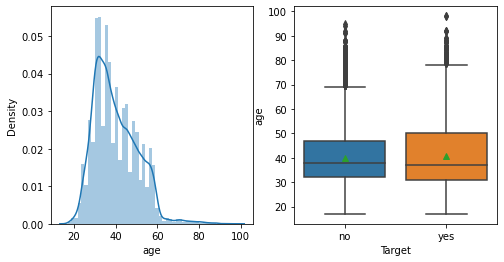

campaign


C:\Users\icode9\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


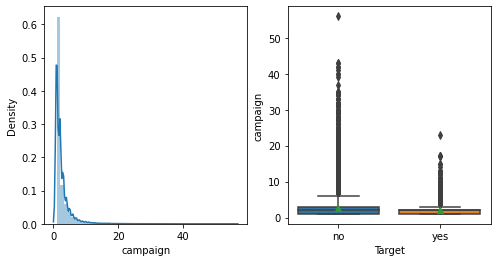

cons.conf.idx


C:\Users\icode9\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


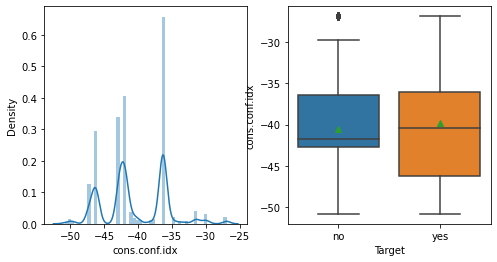

cons.price.idx


C:\Users\icode9\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


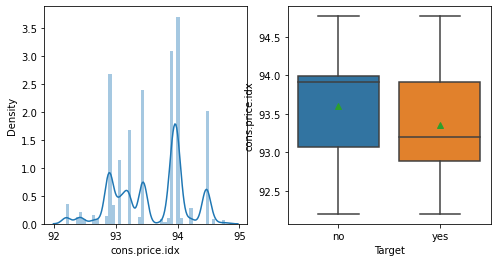

duration


C:\Users\icode9\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


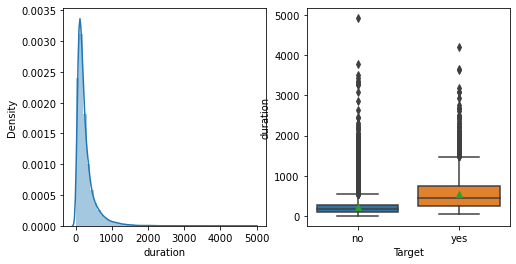

emp.var.rate


C:\Users\icode9\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


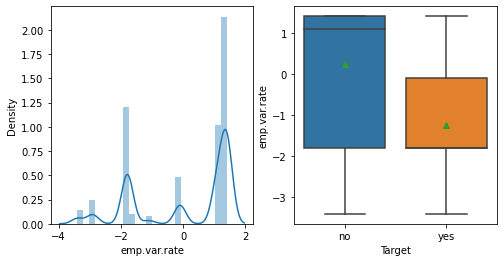

euribor3m


C:\Users\icode9\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


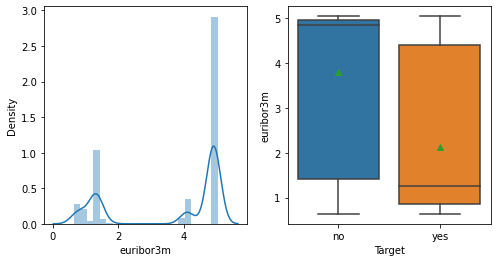

nr.employed


C:\Users\icode9\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


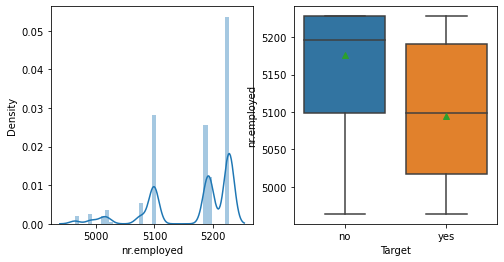

pdays


C:\Users\icode9\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


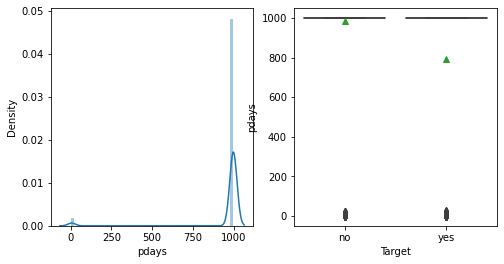

previous


C:\Users\icode9\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


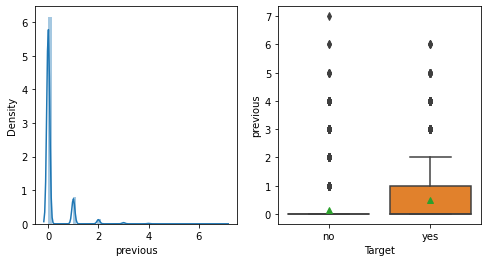

In [9]:
for cols in numer:
    print(cols)
    plt.figure(figsize=(8,4))
    
    plt.subplot(1, 2, 1)
    sns.distplot(df[cols])
    plt.xlabel(cols)
    plt.ylabel('Density')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='y', y=cols, data=df, showmeans=True)
    plt.xlabel('Target')
    plt.ylabel(cols)
    
    plt.show()

From the plots above there are two plot for each numerical features, distribution plot and box plot. We have different distribution on each categories and we can see the summary statistics more easily to see the outliers.

**Explore Category Features**

We will explore the dataset through category features. 

In [10]:
# Get categorical features
category = df.dtypes[df.dtypes == 'object'].index

category

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [11]:
# Check what kind of options at each categories
for i in range(0, len(category)):
    print(category[i])
    print(df[category[i]].unique(), '\n')

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

marital
['married' 'single' 'divorced' 'unknown'] 

education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

default
['no' 'unknown' 'yes'] 

housing
['no' 'yes' 'unknown'] 

loan
['no' 'yes' 'unknown'] 

contact
['telephone' 'cellular'] 

month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week
['mon' 'tue' 'wed' 'thu' 'fri'] 

poutcome
['nonexistent' 'failure' 'success'] 

y
['no' 'yes'] 



Let's see the visualization

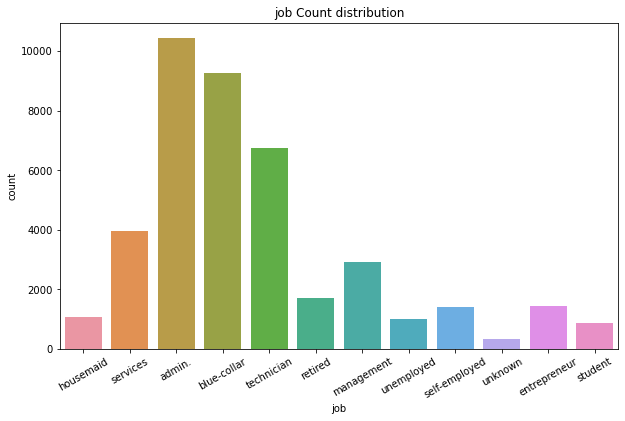

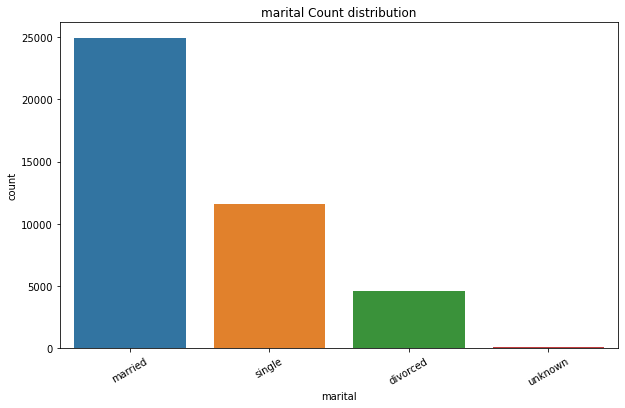

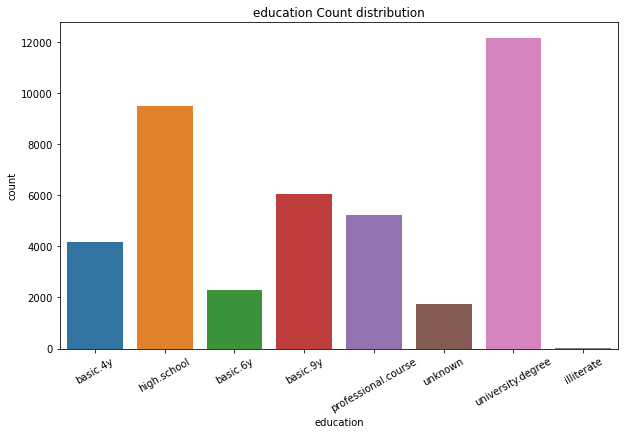

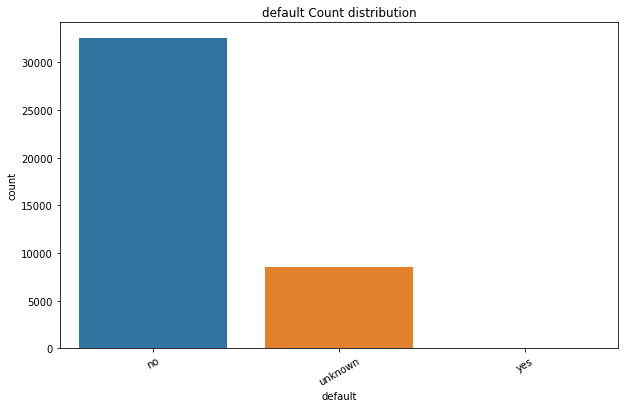

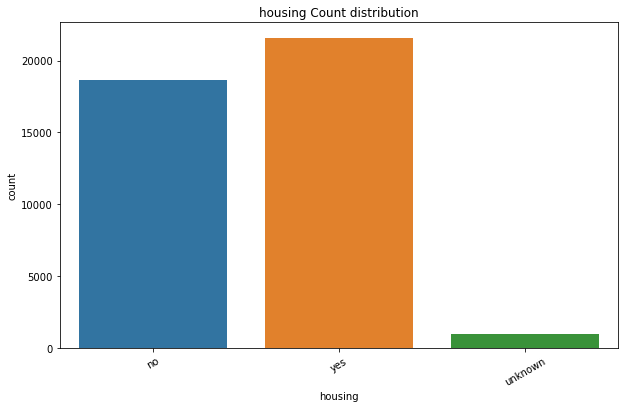

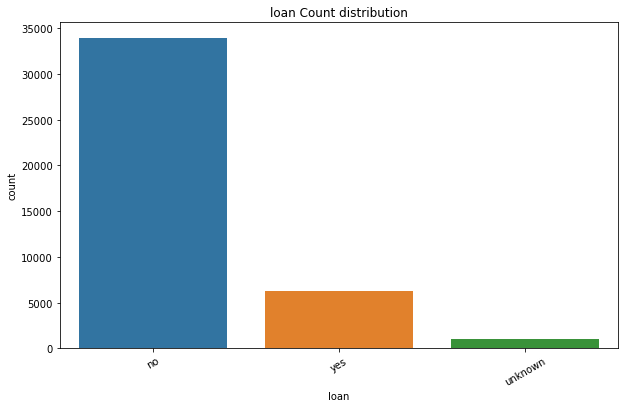

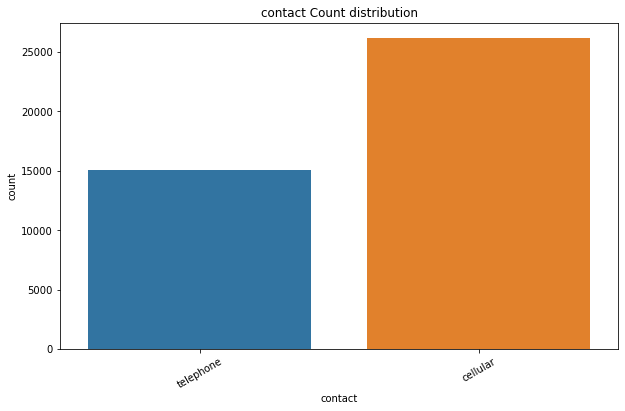

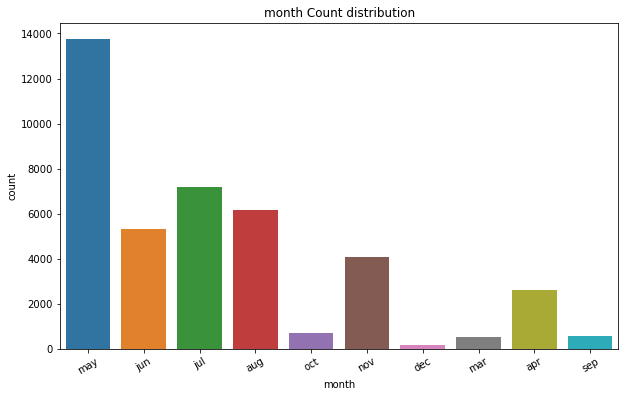

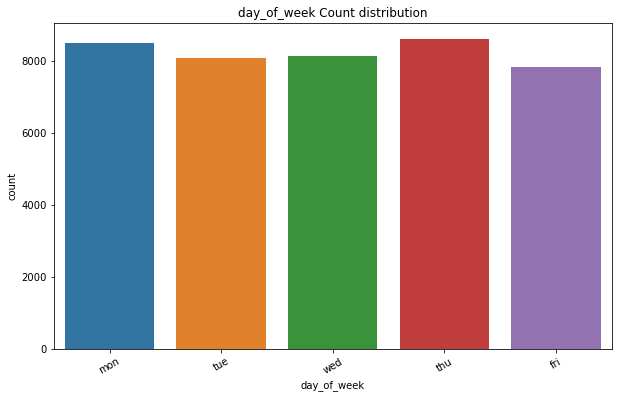

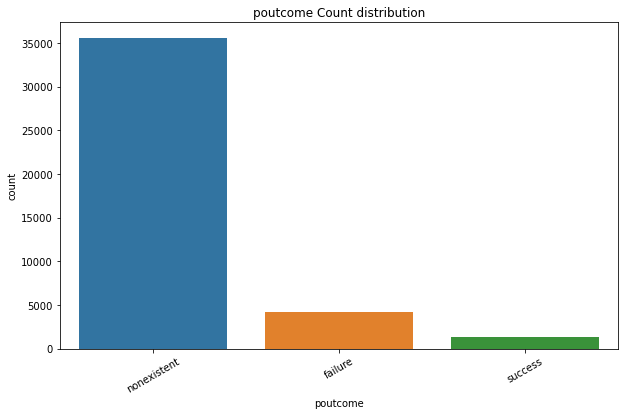

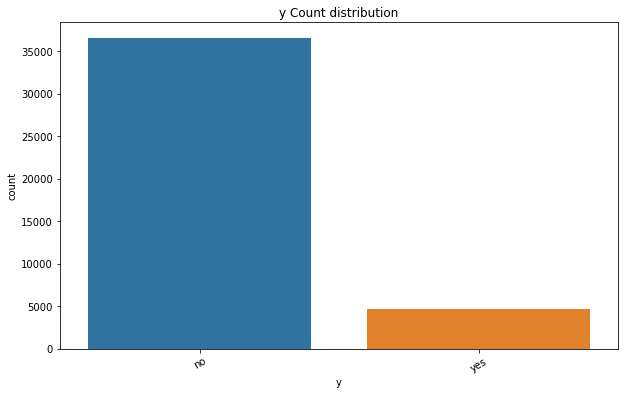

In [12]:
for i in range(0, len(category)):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    sns.countplot(x = category[i], data = df)
    
    ax.set_title('{} Count distribution'.format(category[i]))
    plt.xticks(rotation=30)

From the visualization above, the plots shows the distribution of each categories, like in y feature no value in blue color dominate the dataset with around ~35000 data and yes value in orange color just around ~5000 data.

Some machine learning algorithm needs numeric input, so we will represent categorical data to numerical data using `LabelEncoder` functions.

In [13]:
encoder_cat = LabelEncoder()

In [14]:
for i in range(0, len(category)):
    df[category[i]] = encoder_cat.fit_transform(df[category[i]])

In [15]:
pd.set_option('max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


To get more insights from this dataset, let's see the correlation between each features using heatmap visualization.

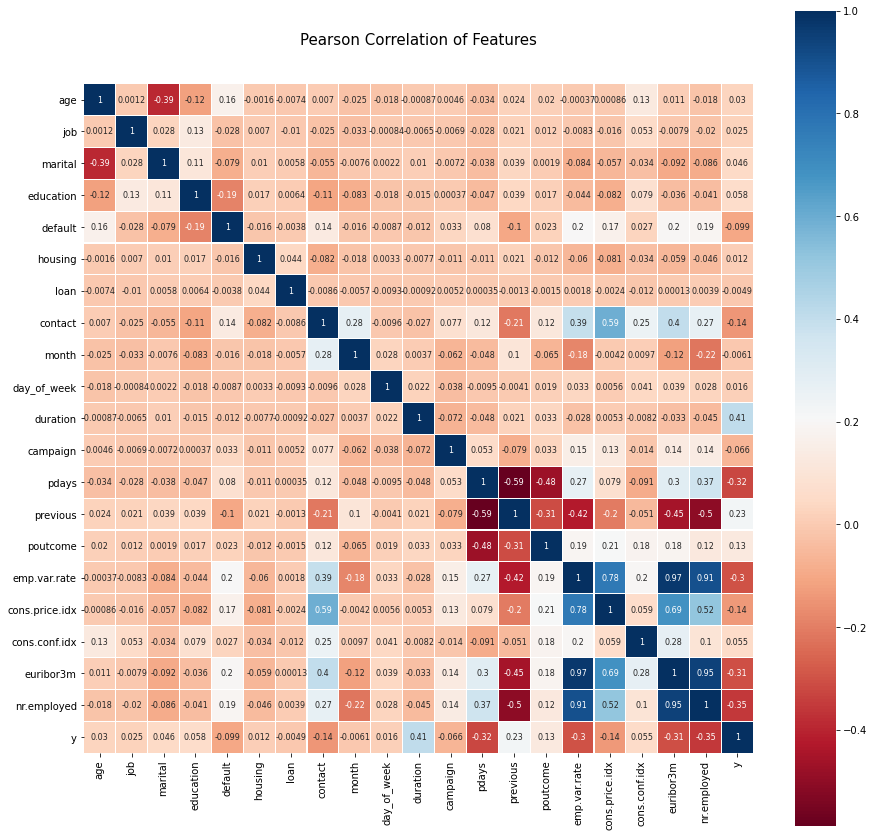

In [16]:
heatmapdata = df

colormap = plt.cm.RdBu
plt.figure(figsize=(15, 15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmapdata.astype(float).corr(), 
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True, 
            annot_kws={'size':8})
del heatmapdata

This heatmap shows correlation between the features using numbers and colors. The shades of blue and high number indicates higher correlation. Meanwhile, the shades of red and low number indicates lower relationship. For example, emp.var.rate and euribor3m features has blue color and high relationship around 0.97.

Next, we will separate the features into attribute values(x) and class label(y). We will use the y feature as target feature or class label.

In [17]:
# drop y feature from x dataset, so it's just contain attribute values
x = df.drop('y', 1)

# y variable contain y feature
y = df.y

In [18]:
# check the x features
x.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [19]:
x = pd.get_dummies(x)
x.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [20]:
# check y feature
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

After separated the attribute and class features into variable, we will split the dataset into training and testing dataset. The proportion for testing set is 30%.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=13)

### Logistic Regression

Let's do Logistic Regression classification.

In [22]:
# import Logistic Regression module
from sklearn.linear_model import LogisticRegression

# create logistic regression model using liblinear solver
LR = LogisticRegression(solver='liblinear')
# set the training data
LR.fit(x_train, y_train)
# get the prediction
pred_LR = LR.predict(x_test)

# get the accuracy and confussion matrix
acc_LR = accuracy_score(y_test, pred_LR)
print(acc_LR)
print(confusion_matrix(y_test, pred_LR))
print(classification_report(y_test, pred_LR))

0.9079064497855467
[[10665   312]
 [  826   554]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10977
           1       0.64      0.40      0.49      1380

    accuracy                           0.91     12357
   macro avg       0.78      0.69      0.72     12357
weighted avg       0.90      0.91      0.90     12357



The accuracy score using Logistic Regression is 90.79% and from the confusion matrix we can see the data in main diagonal is data that predicted accurately. There are 11219(10665+554) data predicted true and 1138(826+312) data was false predicted. From classification report also shows that proportion for 0(no) class to predicted was more accurate than 1(yes) class.

### K-Nearest Neighbors

Let's do Logistic K-Nearest Neighbors classification

In [23]:
# import K-Nearest Neighbors module
from sklearn.neighbors import KNeighborsClassifier

# create the KNN model and predict the testing
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)

# get the accuracy and confussion matrix
acc_KNN = accuracy_score(y_test, pred_KNN)
print(acc_KNN)
print(confusion_matrix(y_test, pred_KNN))

0.907016266084001
[[10511   466]
 [  683   697]]


The accuracy score using K-Nearest Neighbors is 90.70% and there are 11208(10511+697) data predicted true and 1149(683+466) data was false predicted. 

### Support Vector Machine

Let's do Support Vector Machine classification.

In [24]:
# import Support Vector Machine module
from sklearn import svm

# create the SVM model and predict the testing
modelSVM = svm.SVC()
modelSVM.fit(x_train, y_train)
pred_SVM = modelSVM.predict(x_test)

# get the accuracy and confussion matrix
acc_SVM = accuracy_score(y_test, pred_SVM)
print(acc_SVM)
print(confusion_matrix(y_test, pred_SVM))

0.899166464352189
[[10781   196]
 [ 1050   330]]


The accuracy score using Support Vector Machine is 89.91% and there are 11111(10781+330) data predicted true and 1246(1050+196) data was false predicted. 

### Decision Tree

Let's do Decision Tree classification.

In [25]:
# import Decision Tree module
from sklearn.tree import DecisionTreeClassifier

# create the Decision Tree model and predict the testing
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
pred_DT = DT.predict(x_test)

# get the accuracy and confussion matrix
acc_DT = accuracy_score(y_test, pred_DT)
print(acc_DT)
print(confusion_matrix(y_test, pred_DT))

0.8888079630978393
[[10255   722]
 [  652   728]]


The accuracy score using Decision Tree is 88.88% and there are 10983(10255+728) data predicted true and 1374(652+722) data was false predicted. 

### Random Forest

Let's do Random Forest classification.

In [26]:
# import Random Forest module
from sklearn.ensemble import RandomForestClassifier

# create the Random Forest model and predict the testing
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
pred_RF = RF.predict(x_test)

# get the accuracy and confussion matrix
acc_RF = accuracy_score(y_test, pred_RF)
print(acc_RF)
print(confusion_matrix(y_test, pred_RF))

0.9151088451889617
[[10574   403]
 [  646   734]]


The accuracy score using Random Forest is 91.51% and there are 11308(10574+734) data predicted true and 1049(646+403) data was false predicted. 

### Naive Bayes

Let's do Naive Bayes classification.

In [28]:
# import Naive Bayes module
from sklearn.naive_bayes import GaussianNB

# create the Naive Bayes model and predict the testing
NB = GaussianNB()
NB.fit(x_train, y_train)
pred_NB = NB.predict(x_test)

# get the accuracy and confussion matrix
acc_NB = accuracy_score(y_test, pred_NB)
print(acc_NB)
print(confusion_matrix(y_test, pred_NB))

0.8434895201100591
[[9587 1390]
 [ 544  836]]


The accuracy score using Naive Bayes is 84.34% and there are 10423(9587+836) data predicted true and 1934(544+1390) data was false predicted. 

**The summary of all classification accuracy**

In [29]:
print('Logistic Regression: ', acc_LR)
print('K-Nearest Neighbors: ', acc_KNN)
print('Support Vector Machine: ', acc_SVM)
print('Decision Tree: ', acc_DT)
print('Random Forest: ', acc_RF)
print('Naive Bayes: ', acc_NB)

Logistic Regression:  0.9079064497855467
K-Nearest Neighbors:  0.907016266084001
Support Vector Machine:  0.899166464352189
Decision Tree:  0.8888079630978393
Random Forest:  0.9151088451889617
Naive Bayes:  0.8434895201100591


From all the classification method, I choose Random Forest algorithm for Bank Marketing Dataset to predict if the client will subscribe term deposit or not. The reason is because this algorithm produces the highest accuracy than others (91.51%), and from the confusion matrix we know this algorithm can predict well up to 11308 data from 12357 data.